# DATA TYPE AND MUTABILITY
- In Python everything is object every object is an unique identity
- Mutable (changable) and Immutable (this is not changable) always check the identity
- 🔁 Mutable Data Types
- ✅ Characteristics:
## Contents can be modified (add, delete, update).

- Same memory location (ID) after modification.

## Examples:
- list
- dict
- set
- bytearray
- collections.deque

## Immutable Data Types
- Characteristics:
- Cannot be modified after creation.
- Modifications create a new object (new memory ID).

## Examples:
- int
- float
- bool
- str
- tuple
- frozenset
- bytes

## What is a set?

- Unordered collection of unique, mutable elements.
- Allows adding/removing elements.
- Mutable.

- Not hashable → ❌ Cannot be used as dictionary keys or set elements


## What is a frozenset?

- Unordered collection of unique, immutable elements.

- Immutable version of a set.

- Hashable → ✅ Can be used as dictionary keys or inside other sets.

In [2]:
s = {1, 2, 3}
s.add(4)         # ✅ Works
s.remove(2)      # ✅ Works


What is Hashing?

Hashing is the process of converting data (like a string, number, or object) into a fixed-size integer value, called a hash value or hash code.

Done using Python’s built-in hash() function.

In [9]:
my_set = {'apple', 'banana', 'cherry'}
my_frozen_set = frozenset(my_set)
print(hash("hello"))     
print(hash(42))          
print(hash(my_frozen_set))


-2553141408867959724
42
6657283265755951346


In [10]:
print(hash(my_set))

TypeError: unhashable type: 'set'

In [11]:
# comprehension
# list comprehension
# dict comprehension
# set comprehension
# Generator comprehension

In [14]:
# 🔁 1. List Comprehension


# ✅ Example:
squares = [x**2 for x in range(5)]
# Output: [0, 1, 4, 9, 16]
print("squares",squares)

#✅ With Condition:
even_squares = [x**2 for x in range(10) if x % 2 == 0]
# Output: [0, 4, 16, 36, 64]
print("even_squares",even_squares)


squares [0, 1, 4, 9, 16]
even_squares [0, 4, 16, 36, 64]


In [17]:
# 📦 2. Dictionary Comprehension
squares_dict = {x: x**2 for x in range(5)}
# Output: {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}

even_squares_dict = {x: x**2 for x in range(10) if x % 2 == 0}
# Output: {0: 0, 2: 4, 4: 16, 6: 36, 8: 64}


In [20]:
# Set comprehension
unique_squares = {x**2 for x in range(5)}
# Output: {0, 1, 4, 9, 16}

even_set = {x for x in range(10) if x % 2 == 0}
# Output: {0, 2, 4, 6, 8}


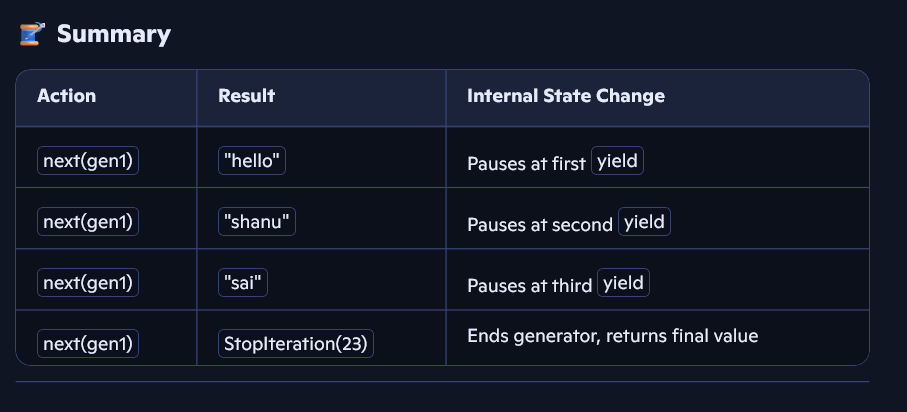

In [42]:
# Generator comprehension
# you save memory, lazy evaluation




gen = (x**2 for x in range(5))
print(next(gen))  # Output: 0
print(next(gen))  # Output: 1

# example 2
def get_result():
    yield "hello"
    yield "shanu"
    a=21
    b=2
    yield "sai"
    c= a+b
    return c
    
    
gen1 = get_result()
print('s',gen1)
print(next(gen1))
print(next(gen1))
print(next(gen1))
try:
    next(gen1)
except StopIteration as e:
    print("Returned value:", e.value)  # Output: 23
    
try:
    next(gen1)
except StopIteration as e:
    print("Returned value:", e.value)  # Output: 23


0
1
s <generator object get_result at 0x000001B5753B8BA0>
hello
shanu
sai
Returned value: 23
Returned value: None


In [36]:
# 🔧 How to Write an Infinite Generator

In [37]:
def infinite_counter(start=0):
    while True:
        yield start
        start += 1


In [38]:
gen = infinite_counter()
print(next(gen))  # 0
print(next(gen))  # 1
print(next(gen))  # 2
# and so on...


0
1
2


In [39]:
# ✅ Example 2: Infinite Toggle

In [40]:
def infinite_toggle():
    while True:
        yield "ON"
        yield "OFF"


In [41]:
gen = infinite_toggle()
print(next(gen))  # "ON"
print(next(gen))  # "OFF"
print(next(gen))  # "ON"


ON
OFF
ON


In [ ]:
# Send value to yeild


In [1]:
def chat_messenger():
    message = yield  'Wait for the first message'
    print(f'You have sent {message}')
    while True:
        message = yield  # Wait for the next message
        print(f'You have sent... {message}')

# Initialize generator
msg = chat_messenger() #creates the generator, but it’s not started yet.

# Prime the generator (advance to first yield)
print(next(msg))  # This starts the generator and pauses at the first yield
# Output: None (since the first `yield` has no value)
#The generator then loops forever, waiting for the next message via yield.
# Send messages
msg.send("Hi") #sends a value to that yield, which assigns "Hi" to message and prints it.
msg.send("Hello")
msg.send("yo")
msg.send("yo")
msg.send("yo")


Wait for the first message
You have sent Hi
You have sent... Hello
You have sent... yo
You have sent... yo
You have sent... yo


In [ ]:
def chat_messenger():
    message = yield 
    print(f'You have send {message}')
    while(True):
        print("Hi")        
msg = chat_messenger()
next(msg)
msg.send("hi")

In [ ]:
# yield from is used to delegate part of a generator’s operations to another generator or iterable.
# It simplifies code that would otherwise involve looping and yielding manually.

In [78]:
def sub_gen():
    yield "Hello"
    yield "from"
    yield "sub_gen"

def main_gen():
    yield "Start"
    yield from sub_gen()  # Delegates to sub_gen
    yield "End"

for item in main_gen():
    print(item)


Start
Hello
from
sub_gen
End


In [79]:
# The .close() method stops a generator and raises a GeneratorExit inside it, which can be caught (though rarely needed) for cleanup.

Chat closed.
You said: Hi
You said: How are you?


In [154]:
def chat_messenger():
    try:
        while True:
            message = yield
            print(f"You said: {message}")
    except GeneratorExit as e:
        print("Chat closed........................",e)

msg = chat_messenger()
next(msg)  # Prime the generator
msg.send("Hi")
msg.send("How are you?")
msg.close()  # Gracefully closes the generator


You said: Hi
You said: How are you?
Chat closed........................ 


In [219]:
from functools import wraps

def my_decorator(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print("Before func args",args)
        print("Before func kwargs",kwargs)
        
        result = func(*args, **kwargs)
        print("result", result)
        print("After func")
        return result  # ← Don't forget this!
    return wrapper


In [220]:
@my_decorator
def greeting(name: str ,month:str,day = 'Tuesday') -> str:
    """This function returns a greeting message."""
    return f'{name} and {month} and  {day} returned.'

In [223]:
answer = greeting(name = 'shanmukh adari',month = 'august',day='Thurday')

Before func args ()
Before func kwargs {'name': 'shanmukh adari', 'month': 'august', 'day': 'Thurday'}
result shanmukh adari and august and  Thurday returned.
After func


In [224]:
print(greeting.__name__)        # 'greeting'
print(greeting.__doc__)         # 'This function returns a greeting message.'
print(greeting.__module__)      # '__main__'
print(greeting.__annotations__) # {}


greeting
This function returns a greeting message.
__main__
{'name': <class 'str'>, 'month': <class 'str'>, 'return': <class 'str'>}


In [225]:
# static and class methods